## 2020 Census Housing Status Profile in Los Angeles County ##

In this assignment, I will be exploring housing type demographics for LA County from the 2020 Census. For our group project we will be creating an interactive visualization tool of several hazardous events (wildfire, flood, landslide, related water contamination) and identifying vulnerable populations that should be prioritized during emergency planning, response, and recovery. By analyzing census data on housing type, we can see where the most vulnerable populations are in LA County, as it relates to housing type.

By Charlotte Sofranek

First thing's first, let's import pandas since I'll be working with a .csv downloaded from Social Explorer

In [94]:
import pandas as pd

### Import Data (with Leading Zeros)
Read in data file and specify 'Geo_FIPS', 'Geo_STATE', 'Geo_COUNTY' as string to solve leading zero issue when these columns are imported as integers, as python automatically does.

In [25]:
# load data file (relative path)
df = pd.read_csv(
    'data/R13285290_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

### Phase 1: Exploration ###

To get a feel for the data, let's look at the size and its different components

In [26]:
df.shape

(2498, 115)

In [27]:
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,PCT_SE_A10004B_015,PCT_SE_A10004B_016,PCT_SE_A10004B_017,PCT_SE_A10004B_018,PCT_SE_A10004B_019,PCT_SE_A10004B_020,PCT_SE_A10004B_021,PCT_SE_A10004B_022,PCT_SE_A10004B_023,PCT_SE_A10004B_024
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,...,6.37,35.87,31.06,6.99,14.60,9.47,4.81,3.73,0.00,1.09
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,...,0.00,35.47,33.72,0.00,33.72,0.00,1.74,0.00,1.74,0.00
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,...,0.00,37.27,34.25,5.77,17.98,10.50,3.02,0.00,3.02,0.00
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,...,0.00,35.18,25.61,3.07,16.67,5.88,9.56,2.72,6.84,0.00
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,...,0.00,29.04,23.65,2.33,5.39,15.93,5.39,5.39,0.00,0.00


In [28]:
type(df)

pandas.core.frame.DataFrame

#### Data types ####
To get the data types, I will use .info() with additional arguments (verbose=True, show_counts=True) as my data  has a lot of columns.

#### Leading Zero Issue
I'll double check that the data type is 'object' for the three columns I imported as strings and make sure the leading zeros show up in each column.

In [29]:
# look at data types
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 115 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    Geo_FIPS            2498 non-null   object 
 1    Geo_QName           2498 non-null   object 
 2    Geo_FILEID          2498 non-null   object 
 3    Geo_STUSAB          2498 non-null   object 
 4    Geo_SUMLEV          2498 non-null   int64  
 5    Geo_GEOCOMP         2498 non-null   int64  
 6    Geo_LOGRECNO        2498 non-null   int64  
 7    Geo_US              0 non-null      float64
 8    Geo_REGION          0 non-null      float64
 9    Geo_DIVISION        0 non-null      float64
 10   Geo_STATECE         0 non-null      float64
 11   Geo_STATE           2498 non-null   object 
 12   Geo_COUNTY          2498 non-null   object 
 13   Geo_COUSUB          0 non-null      float64
 14   Geo_PLACE           0 non-null      float64
 15   Geo_TRACT           2498 non-null   

In [30]:
# Checking our geographic identifier, Geo_FIPS, to make sure leading zeroes show up
df.Geo_FIPS.head()

0    06037101110
1    06037101122
2    06037101220
3    06037101221
4    06037101222
Name: Geo_FIPS, dtype: object

In [31]:
# Checking Geo_STATE to make sure leading zeroes show up
df.Geo_STATE.head()

0    06
1    06
2    06
3    06
4    06
Name: Geo_STATE, dtype: object

In [32]:
# Checking Geo_COUNTY to make sure leading zeroes show up
df.Geo_COUNTY.head()

0    037
1    037
2    037
3    037
4    037
Name: Geo_COUNTY, dtype: object

Yep, looks like the FIP, STATE, and COUNTY fields have imported correctly with their leading zeros

### Phase 2: Cleaning Up the Data

#### Drop/Delete Null Columns
To find the columns that have ALL null values top to bottom, I'll use the isna().all() command

In [34]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

We want to get rid of these columns as they give us no information. I will use the pandas command *.dropna()* to do so. Since we want to remove all columns that have ALL null values, I'll use the command with arguments *axis=1* *how="all"*

In [35]:
df = df.dropna(axis=1,how="all")

In [36]:
# Check the data again and confirm null columns have been removed
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 72 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Geo_FIPS            2498 non-null   object 
 1   Geo_QName           2498 non-null   object 
 2   Geo_FILEID          2498 non-null   object 
 3   Geo_STUSAB          2498 non-null   object 
 4   Geo_SUMLEV          2498 non-null   int64  
 5   Geo_GEOCOMP         2498 non-null   int64  
 6   Geo_LOGRECNO        2498 non-null   int64  
 7   Geo_STATE           2498 non-null   object 
 8   Geo_COUNTY          2498 non-null   object 
 9   Geo_TRACT           2498 non-null   int64  
 10  Geo_GEOID           2498 non-null   object 
 11  Geo_NAME            2498 non-null   object 
 12  SE_A10054B_001      2498 non-null   int64  
 13  SE_A10054B_002      2498 non-null   int64  
 14  SE_A10054B_003      2498 non-null   int64  
 15  SE_A10054B_004      2498 non-null   int64  
 16  SE_A10

#### The Data Dictionary
Many of these column names don't make sense as the variables are a mish-mash of numbers and letters. To decipher what these columns are we need the data dictionary (available on Social Explorer) which can be imported here for reference...HOWEVER, for some reason Social Explorer was not letting me download the data dictionary associated with my tables so I will be referring to the data dictionary found here:
* [Social Explorer data dictionary](https://www.socialexplorer.com/data/ACS2021_5yr/metadata/?ds=SE&table=A10004B)

#### What Data Points do we want to look at?
I downloaded two data tables from the Social Explorer ACS 5-Year Estimates, ***Household Type (Including Living Alone) and Age of Householder (Renter-Occupied Housing Units)*** and ***Vehicles Available (Renter-Occupied Housing Units)***, since I am interested in identifying especially vulnerable households (aka among renter-occupied units) by household type (aka living alone or single-parent), by age of renter (aka 65+), and then by access to a car (no car = more vulnerable during disasters).

For now, I just want to analyze househould types among renter-occupied units, so I will create a subset of data with the relevant columns:

#### Columns to Keep
* Geo_FIPS
* A10004B_001 Renter-Occupied Housing Units
  * A10004B_002 Family Households
    * A10004B_003 Married-Couple Family
        * A10004B_004 15-35 years
        * A10004B_005 35-64 years
        * A10004B_006 65+ years
    * A10004B_007 Other Family
        * A10004B_008 Male; No wife present
            * A10004B_009 15-35 years
            * A10004B_010 35-64 years
            * A10004B_011 65+ years
        * A10004B_012 Female; No husband present
            * A10004B_013 15-35 years
            * A10004B_014 35-64 years
            * A10004B_015 65+ years
  * A10004B_016 Non-Family Households
    * A10004B_017 Living Alone
        * A10004B_018 15-35 years
        * A10004B_019 35-64 years
        * A10004B_020 65+ years
    * A10004B_021 Not Living Alone
        * A10004B_022 15-35 years
        * A10004B_023 35-64 years
        * A10004B_024 65+ years

#### Creating a New Dataframe
Let's create a subset of our dataframe with the columns above, and call it ***df_household***

In [38]:
# define columns to keep
columns_to_keep = ['Geo_FIPS',
                   'SE_A10004B_001',
                   'SE_A10004B_002',
                   'SE_A10004B_003',
                   'SE_A10004B_004',
                   'SE_A10004B_005',
                   'SE_A10004B_006',
                   'SE_A10004B_007',
                   'SE_A10004B_008',
                   'SE_A10004B_009',
                   'SE_A10004B_010',
                   'SE_A10004B_011',
                   'SE_A10004B_012',
                   'SE_A10004B_013',
                   'SE_A10004B_014',
                   'SE_A10004B_015',
                   'SE_A10004B_016',
                   'SE_A10004B_017',
                   'SE_A10004B_018',
                   'SE_A10004B_019',
                   'SE_A10004B_020',
                   'SE_A10004B_021',
                   'SE_A10004B_022',
                   'SE_A10004B_023',
                   'SE_A10004B_024']
# add it to a new dataframe
df_household = df[columns_to_keep]

#### Renaming Columns
To rename our columns to the names that actually make sense, we first have to make a list of column names as they exist now

In [40]:
columns = list(df_household) # same output as df.columns.to_list()

['Geo_FIPS',
 'SE_A10004B_001',
 'SE_A10004B_002',
 'SE_A10004B_003',
 'SE_A10004B_004',
 'SE_A10004B_005',
 'SE_A10004B_006',
 'SE_A10004B_007',
 'SE_A10004B_008',
 'SE_A10004B_009',
 'SE_A10004B_010',
 'SE_A10004B_011',
 'SE_A10004B_012',
 'SE_A10004B_013',
 'SE_A10004B_014',
 'SE_A10004B_015',
 'SE_A10004B_016',
 'SE_A10004B_017',
 'SE_A10004B_018',
 'SE_A10004B_019',
 'SE_A10004B_020',
 'SE_A10004B_021',
 'SE_A10004B_022',
 'SE_A10004B_023',
 'SE_A10004B_024']

In [41]:
# replace existing column names with new column names (specified in order)
df_household.columns = ['FIPS',
'Total Renter-Occupied',
'Family Households',
'Married-Couple Family',
'Married-Couple: 15-35yrs',
'Married-Couple: 35-64yrs',
'Married-Couple: 65+yrs',
'Single-Parent Family',
'Single-Father',
'Single-Father: 15-35yrs',
'Single-Father: 35-64yrs',
'Single-Father: 65+yrs',
'Single-Mother',
'Single-Mother: 15-35yrs',
'Single-Mother: 35-64yrs',
'Single-Mother: 65+yrs',
'Nonfamily Households',
'Living Alone',
'Living Alone: 15-35yrs',
'Living Alone: 35-64yrs',
'Living Alone: 65+yrs',
'Not Living Alone',
'Not Living Alone: 15-35yrs',
'Not Living Alone: 35-64yrs',
'Not Living Alone: 65+yrs']


In [48]:
df_household.sample(5)

,FIPS,Total Renter-Occupied,Family Households,Married-Couple Family,Married-Couple: 15-35yrs,Married-Couple: 35-64yrs,Married-Couple: 65+yrs,Single-Parent Family,Single-Father,Single-Father: 15-35yrs,...,Single-Mother: 65+yrs,Nonfamily Households,Living Alone,Living Alone: 15-35yrs,Living Alone: 35-64yrs,Living Alone: 65+yrs,Not Living Alone,Not Living Alone: 15-35yrs,Not Living Alone: 35-64yrs,Not Living Alone: 65+yrs
846,06037236206,1311,708,300,0,300,0,408,159,72,...,78,603,569,61,315,193,34,0,34,0
398,06037183104,247,112,69,16,31,22,43,7,0,...,0,135,83,32,26,25,52,25,27,0
1052,06037292001,1126,880,398,97,223,78,482,74,28,...,0,246,117,0,99,18,129,31,98,0
1667,06037531503,590,514,158,24,84,50,356,218,92,...,1,76,64,31,20,13,12,12,0,0
1839,06037550101,146,131,89,0,89,0,42,19,9,...,0,15,15,0,10,5,0,0,0,0


### Phase 3: Creating Simple Stats and Plots

In [44]:
# get a summary of stats
df_household['Total Renter-Occupied'].describe()

count    2498.000000
mean      719.328263
std       495.157153
min         0.000000
25%       345.000000
50%       640.000000
75%       996.500000
max      4790.000000
Name: Total Renter-Occupied, dtype: float64

In [49]:
df_household['Total Renter-Occupied'].sum()

1796882

Total of 1,796,882 renter-occupied housing units in LA County

<AxesSubplot: ylabel='Frequency'>

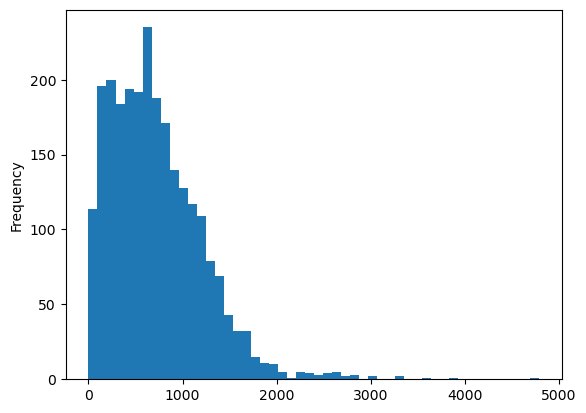

In [45]:
# plot it as a histogram with 50 bins
df_household['Total Renter-Occupied'].plot.hist(bins=50)

<AxesSubplot: >

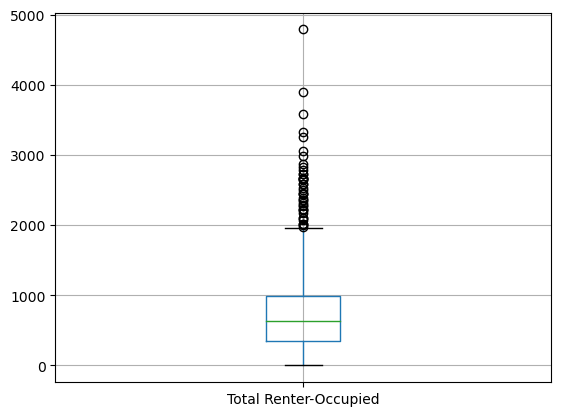

In [50]:
df_household.boxplot(column=['Total Renter-Occupied'])

<AxesSubplot: xlabel='Single-Father', ylabel='Single-Mother'>

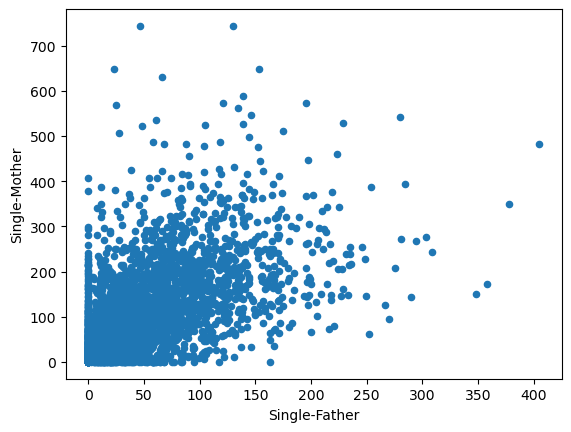

In [53]:
df_household.plot.scatter(x='Single-Father',y='Single-Mother')

#### Sorting the Data
After some initial research and based on intuition, I believe people living alone, especially 65+, are particularly vulnerable before, during, and after disaster events. The next most vulnerable likely being single-parent families. Because of this, I want to prioritize solitary populations and the census tracts with the highest 'Living Alone' populations.

In [64]:
df_sorted = df_household.sort_values(by='Living Alone: 65+yrs',ascending = False)

In [69]:
# display the data, but just a 10 columns to keep it clean
df_sorted[['FIPS','Living Alone: 65+yrs']].head(10)

,FIPS,Living Alone: 65+yrs
602,06037207502,958
2255,06037701402,853
2264,06037701902,700
2329,06037900806,682
1480,06037462201,607
1157,06037310704,564
1211,06037401902,549
2348,06037901215,546
2238,06037700102,506
2266,06037702102,493


<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Populations of Elderly Living Alone'}, ylabel='FIPS'>

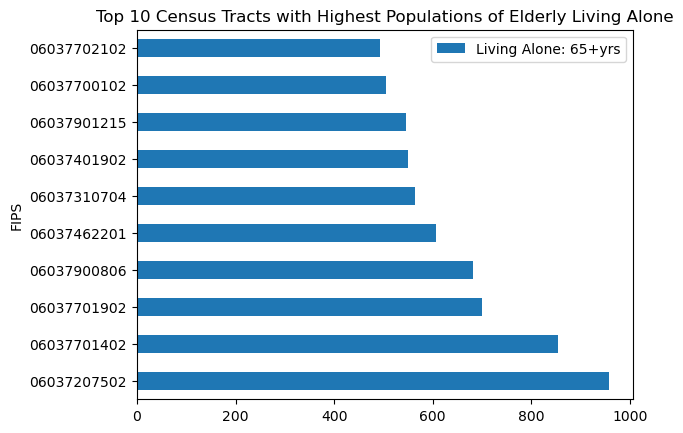

In [66]:
# let's plot it (and give it a title)
df_sorted.head(10).plot.barh(x='FIPS',
                            y='Living Alone: 65+yrs',
                           title='Top 10 Census Tracts with Highest Populations of Elderly Living Alone')

#### Subsetting the Data
Since I'm interested in prioritizing the most vulnerable populations across LA County, I want to subset my data to those census tracts with over 200 households with renters 65+yrs

In [71]:
# subset the data
df_household[df_household['Living Alone: 65+yrs']>200]

,FIPS,Total Renter-Occupied,Family Households,Married-Couple Family,Married-Couple: 15-35yrs,Married-Couple: 35-64yrs,Married-Couple: 65+yrs,Single-Parent Family,Single-Father,Single-Father: 15-35yrs,...,Single-Mother: 65+yrs,Nonfamily Households,Living Alone,Living Alone: 15-35yrs,Living Alone: 35-64yrs,Living Alone: 65+yrs,Not Living Alone,Not Living Alone: 15-35yrs,Not Living Alone: 35-64yrs,Not Living Alone: 65+yrs
26,06037104321,602,257,188,48,140,0,69,35,35,...,0,345,313,26,59,228,32,32,0,0
69,06037108202,952,442,337,52,233,52,105,60,17,...,15,510,493,0,249,244,17,17,0,0
92,06037111402,1748,1265,578,45,473,60,687,175,57,...,60,483,389,19,67,303,94,65,29,0
166,06037120400,1371,960,490,159,249,82,470,137,118,...,32,411,392,42,84,266,19,0,19,0
195,06037123304,1346,785,490,0,341,149,295,65,8,...,31,561,512,59,130,323,49,16,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348,06037901215,720,27,10,10,0,0,17,17,0,...,0,693,693,0,147,546,0,0,0,0
2368,06037910501,2000,1160,358,75,236,47,802,153,116,...,36,840,759,120,326,313,81,60,21,0
2441,06037920312,1150,549,330,119,106,105,219,51,40,...,35,601,484,17,35,432,117,74,43,0
2448,06037920330,611,184,155,0,76,79,29,0,0,...,21,427,406,37,36,333,21,7,14,0


In [72]:
# create a new variable for census tracts with solitary elderly populations greater than 200
df_alone_elderly = df_household[df_household['Living Alone: 65+yrs']>200]

In [74]:
# display it
df_alone_elderly[['FIPS','Living Alone: 65+yrs']]

,FIPS,Living Alone: 65+yrs
26,06037104321,228
69,06037108202,244
92,06037111402,303
166,06037120400,266
195,06037123304,323
...,...,...
2348,06037901215,546
2368,06037910501,313
2441,06037920312,432
2448,06037920330,333


### Phase 4: Creating Maps!


Now we'll need to import geopandas as we'll be working with a .geojson file to create our maps

In [76]:
import geopandas as gpd

In [77]:
# read in a geojson file for the 2020 Census
tracts=gpd.read_file('data/Census_Tracts_2020.geojson')
tracts.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<AxesSubplot: >

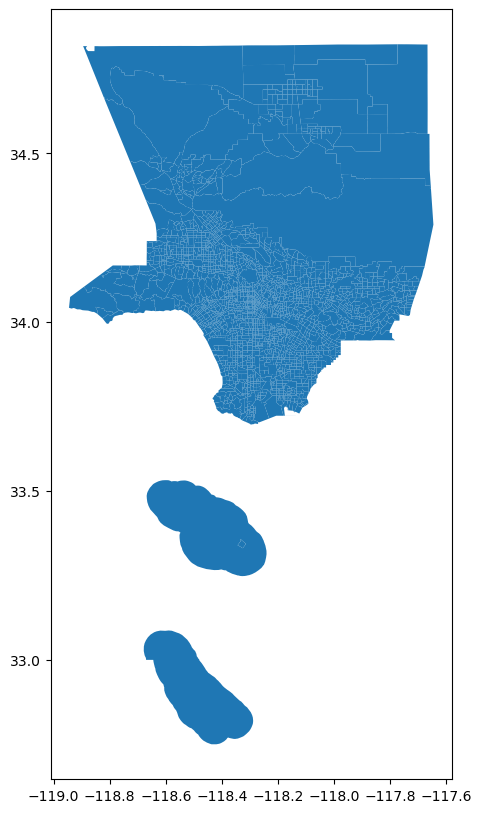

In [78]:
# let's do a quick plot of the census data
tracts.plot(figsize=(12,10))

In [79]:
# Now let's quickly get some info on the data
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int64   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


We are only using the .geojson file to be able to map the data, so we only need two columns: FIP aka 'CT20' (to be able to connect to our housing type dataframe) and geography (to map!)

In [80]:
# let's subset the data
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


Now we need to add leading zeros to make 'CT20' field match 'FIP' fields 

In [82]:
# I will create a 'FIPS' field in this dataset and populate with the proper FIPS. Made sure that 'FIPS' column does not already exist in this dataset
tracts['FIPS'] = '06' + '037' + tracts['CT20']

In [83]:
# let's check it
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


#### Merging Dataframes ####
To map our ACS census housing type data, we must join it with our census geojson data by the 'FIPS' field

In [86]:
# create a new dataframe based on the join
tracts_household=tracts.merge(df_household,on="FIPS")

In [90]:
# let's check what that did
tracts_household.head()

,CT20,geometry,FIPS,Total Renter-Occupied,Family Households,Married-Couple Family,Married-Couple: 15-35yrs,Married-Couple: 35-64yrs,Married-Couple: 65+yrs,Single-Parent Family,...,Single-Mother: 65+yrs,Nonfamily Households,Living Alone,Living Alone: 15-35yrs,Living Alone: 35-64yrs,Living Alone: 65+yrs,Not Living Alone,Not Living Alone: 15-35yrs,Not Living Alone: 35-64yrs,Not Living Alone: 65+yrs
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,644,413,244,9,196,39,169,...,41,231,200,45,94,61,31,24,0,7
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,344,222,105,29,76,0,117,...,0,122,116,0,116,0,6,0,6,0
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,762,478,364,32,252,80,114,...,0,284,261,44,137,80,23,0,23,0
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,1140,739,617,59,382,176,122,...,0,401,292,35,190,67,109,31,78,0
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,816,579,356,28,225,103,223,...,0,237,193,19,44,130,44,44,0,0


Yay! Now our two dataframes are joined which we see by the inclusion of geometry with our household type dataframe

#### FaNcY MaPs
Let's try to create some choropleth maps in geopandas

<AxesSubplot: >

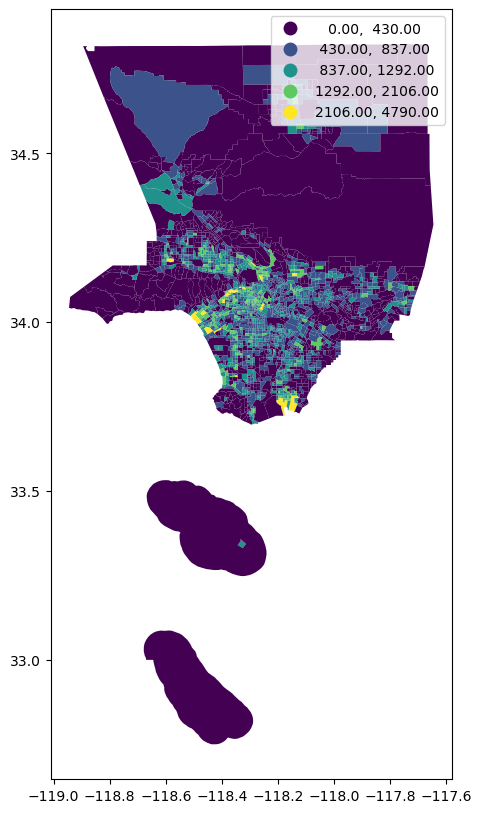

In [91]:
# map of census tracts by density of total renter-occupied units
tracts_household.plot(figsize=(12,10),
                 column='Total Renter-Occupied',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot: >

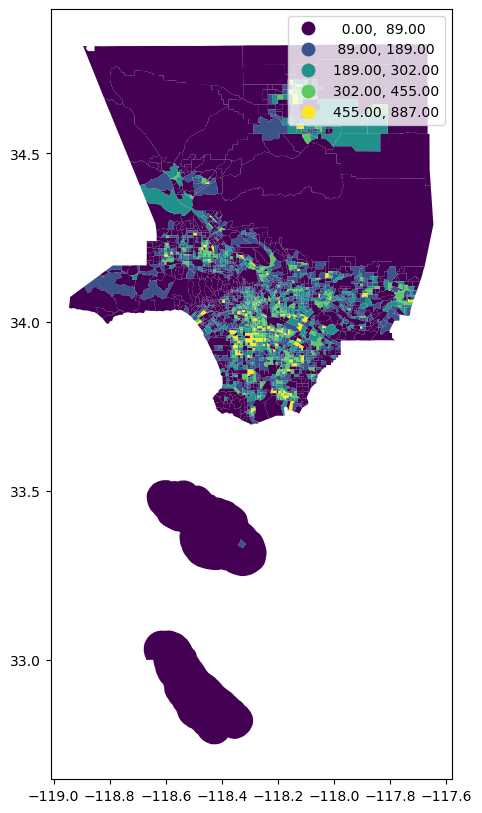

In [92]:
# map of census tracts by density of single-parent family households
tracts_household.plot(figsize=(12,10),
                 column='Single-Parent Family',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot: >

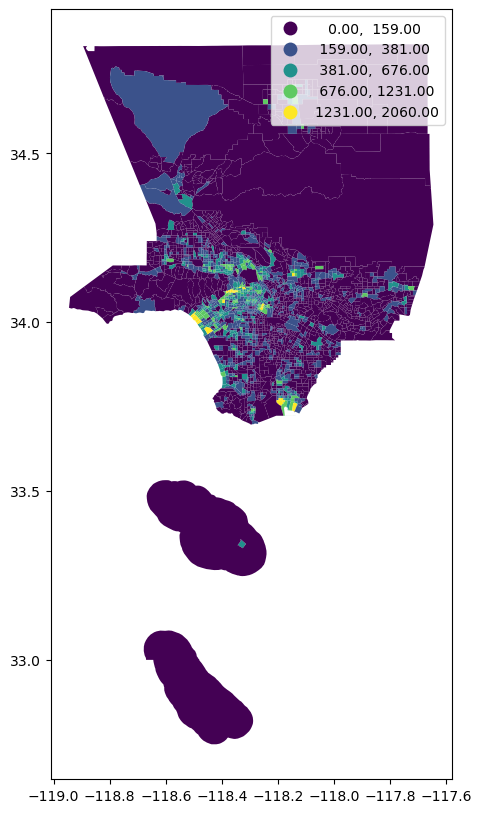

In [93]:
# map of census tracts by density of people living alone
tracts_household.plot(figsize=(12,10),
                 column='Living Alone',
                 legend=True, 
                 scheme='NaturalBreaks')

Interesting that the three populations I chose to map, renter-occupied housing units, single-parent families, and those living alone, all have slightly different spreads and areas of highest concentrations.

Very interesting to find that West Los Angeles, from Santa Monica to Westwood, has the highest densities of people living alone...which makes sense due to all of the students and young professionals in the area.

### THE END. ###